***Reference:***

**Kapoor, Amita; Gulli, Antonio; Pal, Sujit. Deep Learning with TensorFlow and Keras: Build and deploy supervised, unsupervised, deep, and reinforcement learning models, 3rd Edition . Packt Publishing.**

# Chapter 1: Neural Networks

In [1]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras

print(tf.__version__)
print(tf.config.list_physical_devices("GPU"))

2.10.1
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


## MNIST Data

In [2]:
# Lodaing MNIST dataset
mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data("mnist.npz")

X_train.shape, y_train.shape, X_test.shape, y_test.shape

# 60k images arranges in 28*28 grid layout

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

In [3]:
X_train[0].shape

(28, 28)

In [4]:
np.max(X_train[0]), np.min(X_train[0])

(255, 0)

In [5]:
len(X_train), tf.reduce_max(X_train), tf.math.reduce_min(X_train)

(60000,
 <tf.Tensor: shape=(), dtype=uint8, numpy=255>,
 <tf.Tensor: shape=(), dtype=uint8, numpy=0>)

In [6]:
# reshape the 28 * 28 pixel values one-dimensional row vectors,
# which represent the rows in our X array (784 per row or image)

RESHAPED = 784

X_train = X_train.reshape(len(X_train), RESHAPED).astype('float32')
X_test = X_test.reshape(len(X_test), RESHAPED).astype('float32')

# Normalize the data to be within [0,1]
X_train /= 255
X_test /= 255

In [7]:
X_train.shape, X_test.shape

((60000, 784), (10000, 784))

In [8]:
X_train[0].shape, np.max(X_train[0]), np.min(X_train[0])

((784,), 1.0, 0.0)

In [10]:
# One-hot Encoding of labels
NB_CLASSES=10

y_train = tf.keras.utils.to_categorical(y_train, num_classes=NB_CLASSES)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=NB_CLASSES)

y_train.shape

(60000, 10)

## Single Layer Neural Network

```
loss: 0.2759 - accuracy: 0.9227 - val_loss: 0.2753 - val_accuracy: 0.9236

Test Accuracy: 0.9225
Test Loss: 0.2770
```

In [10]:
# Model Params
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2


# Bulild the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(units=NB_CLASSES, 
                             input_shape=(RESHAPED,),
                             activation='softmax',
                             name="dense_layer"))

After building the model we need to compile it and for that we need:

- Optimizer: is as specific algo. used to update the weights while we train the model.

- Objective function/loss_func/cost_func: which is used by optimizers to navigate the space of weights(i.e. loss minimization). Some common objective/loss  functions are:
    - `mse`,`mae`, `binary_crossentropy`(for binary classification), `categorical_crossentropy`(for multi-class classification)

- Common Metrics:
    - **Accuracy**, defined as the proportion of correct predictions with respect to the total number of predictions.
    
    - **Precision**, defined as the proportion of correct positive predictions with respect to the number of correct and incorrect positive predictions.

    - **Recall**, defined as the proportion of correct positive predictions with respect to the actual number of positive predictions.
    
- **Metrics** are similar to objective functions, with the only difference being that they are not used for training a model, **only for evaluating the model.**

- However, it is important to understand the **difference between metrics and objective functions:**

    - As discussed, the loss function is used to optimize your network. This is the function minimized by the selected optimizer. Instead, a metric is used to judge the performance of your network. This is only for you to run an evaluation, and it should be separated from the optimization process.

In [11]:
# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Train the model
model_history = model.fit(X_train, y_train,
                          batch_size=BATCH_SIZE,
                          epochs=EPOCHS,
                          verbose=VERBOSE,
                          validation_split=VALIDATION_SPLIT)

Epoch 1/200
375/375 [==============================] - 2s 3ms/step - loss: 1.3643 - accuracy: 0.6875 - val_loss: 0.8879 - val_accuracy: 0.8253
Epoch 2/200
375/375 [==============================] - 1s 2ms/step - loss: 0.7889 - accuracy: 0.8297 - val_loss: 0.6546 - val_accuracy: 0.8593
Epoch 3/200
375/375 [==============================] - 1s 2ms/step - loss: 0.6413 - accuracy: 0.8518 - val_loss: 0.5606 - val_accuracy: 0.8712
Epoch 4/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5696 - accuracy: 0.8616 - val_loss: 0.5083 - val_accuracy: 0.8788
Epoch 5/200
375/375 [==============================] - 1s 2ms/step - loss: 0.5259 - accuracy: 0.8678 - val_loss: 0.4744 - val_accuracy: 0.8833
Epoch 6/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4957 - accuracy: 0.8734 - val_loss: 0.4505 - val_accuracy: 0.8871
Epoch 7/200
375/375 [==============================] - 1s 2ms/step - loss: 0.4735 - accuracy: 0.8774 - val_loss: 0.4323 - val_accuracy: 0.8910

In [13]:
# Evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2771 - accuracy: 0.9225
Test Accuracy: 0.9225000143051147
Test Loss: 0.27708277106285095


In [16]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

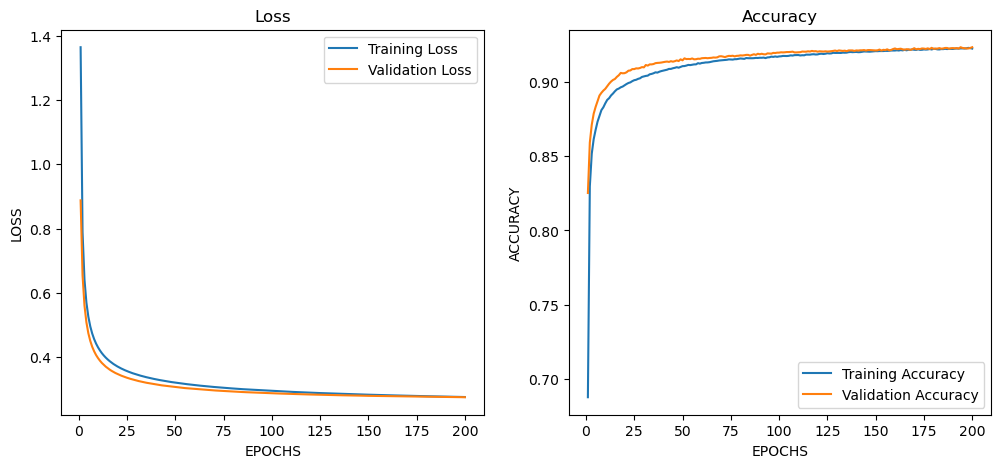

In [27]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,EPOCHS+1),model_history.history['loss'], )
plt.plot(np.arange(1,EPOCHS+1),model_history.history['val_loss'])
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,EPOCHS+1),model_history.history['accuracy'])
plt.plot(np.arange(1,EPOCHS+1),model_history.history['val_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy")

plt.show();

>**NOTE:** We can see that the improvement in our model almost stops or becomes almost imperceptible after certain num of epochs. This is called **CONVERGENCE**.

## Two Hidden Layer NN

```
loss: 0.0988 - accuracy: 0.9721 - val_loss: 0.1217 - val_accuracy: 0.9673

Test Accuracy: 0.9646
Test Loss: 0.1169
```



>**NOTE:** We can see that the improvement in our model almost stops or becomes almost imperceptible after certain num of epochs. This is called **CONVERGENCE**.

In [28]:
import tensorflow.keras.backend as K
K.clear_session()

In [31]:
# Model Params
EPOCHS = 50
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT=0.2


# Build the model 
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(units=N_HIDDEN, 
                             input_shape=(RESHAPED,),
                             name="dense_layer", 
                             activation="relu"))
model.add(keras.layers.Dense(units=N_HIDDEN,
                             activation='relu',
                             name="dense_layer_2"))
model.add(keras.layers.Dense(units=NB_CLASSES, 
                             activation='softmax',
                             name='dense_layer_3'))

# Model Summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model_history1 = model.fit(X_train, y_train,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           validation_split=VALIDATION_SPLIT, 
                           verbose=VERBOSE, workers=10)

Epoch 1/50
375/375 [==============================] - 2s 4ms/step - loss: 1.5014 - accuracy: 0.6128 - val_loss: 0.7620 - val_accuracy: 0.8347
Epoch 2/50
375/375 [==============================] - 1s 3ms/step - loss: 0.5952 - accuracy: 0.8540 - val_loss: 0.4501 - val_accuracy: 0.8863
Epoch 3/50
375/375 [==============================] - 1s 3ms/step - loss: 0.4325 - accuracy: 0.8834 - val_loss: 0.3690 - val_accuracy: 0.9005
Epoch 4/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3726 - accuracy: 0.8957 - val_loss: 0.3316 - val_accuracy: 0.9077
Epoch 5/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3392 - accuracy: 0.9042 - val_loss: 0.3069 - val_accuracy: 0.9117
Epoch 6/50
375/375 [==============================] - 1s 3ms/step - loss: 0.3162 - accuracy: 0.9101 - val_loss: 0.2892 - val_accuracy: 0.9172
Epoch 7/50
375/375 [==============================] - 1s 3ms/step - loss: 0.2980 - accuracy: 0.9147 - val_loss: 0.2753 - val_accuracy: 0.9195
Epoch 

In [33]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.1169 - accuracy: 0.9646
Test Accuracy: 0.9646000266075134
Test Loss: 0.11690307408571243


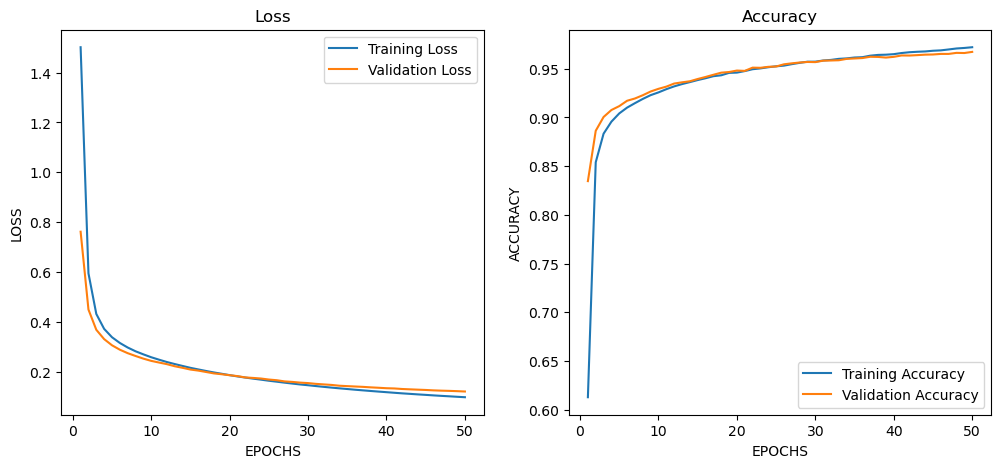

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,EPOCHS+1),model_history1.history['loss'], )
plt.plot(np.arange(1,EPOCHS+1),model_history1.history['val_loss'])
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,EPOCHS+1),model_history1.history['accuracy'])
plt.plot(np.arange(1,EPOCHS+1),model_history1.history['val_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy")

plt.show();

>**NOTE:** We can see that the improvement in our model almost stops or becomes almost imperceptible after certain num of epochs. This is called **CONVERGENCE**.

## Improving the Simple NN with DROPOUT


A simple way to improve Neural-Net is to use `DROPOUT` probability - which randomly ignores/drops few outputs/nodes - This helps the network to learn redundant patterns that are useful for better generalization.

>**NOTE:** Dropouts only happen during training, while testing we use all our highly tuned neurons


```
loss: 0.0749 - accuracy: 0.9766 - val_loss: 0.0792 - val_accuracy: 0.9772
Test Accuracy: 0.9779 - Test Loss: 0.0737
```

#### [DropOut Regularization](https://machinelearningmastery.com/dropout-for-regularizing-deep-neural-networks/)

Dropout is a regularization method that approximates training a large number of neural networks with different architectures in parallel.


During training, some number of layer outputs are randomly ignored or “dropped out.” This has the effect of making the layer look-like and be treated-like a layer with a different number of nodes and connectivity to the prior layer. In effect, each update to a layer during training is performed with a different “view” of the configured layer.


<div align='center'>
    <img src='images/dropout.png'/>
</div>

In [42]:
from tensorflow.keras.backend import clear_session

clear_session()

In [43]:
# Training Params
EPOCHS = 200
BATCH_SIZE = 128
VERBOSE = 2
NB_CLASSES = 10
N_HIDDEN = 128
VALIDATION_SPLIT = 0.2

DROPOUT = 0.3 # Randomly drop 30% of the nodes

# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, 
                             input_shape=(RESHAPED,),
                             name='dense_layer',
                             activation='relu'))
# A drop-out layer after first dense layer
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2',
                             activation='relu'))

model.add(keras.layers.Dropout(DROPOUT))

# Output layer
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_3',
                             activation='softmax'))

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [44]:
# Compile the model
model.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model_history2 = model.fit(X_train, y_train,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           validation_split=VALIDATION_SPLIT,
                           verbose=VERBOSE, workers=None)

Epoch 1/200
375/375 - 1s - loss: 1.6945 - accuracy: 0.4601 - val_loss: 0.8870 - val_accuracy: 0.8112 - 1s/epoch - 4ms/step
Epoch 2/200
375/375 - 1s - loss: 0.9060 - accuracy: 0.7210 - val_loss: 0.5293 - val_accuracy: 0.8673 - 1s/epoch - 3ms/step
Epoch 3/200
375/375 - 1s - loss: 0.6889 - accuracy: 0.7876 - val_loss: 0.4202 - val_accuracy: 0.8873 - 1s/epoch - 3ms/step
Epoch 4/200
375/375 - 1s - loss: 0.5920 - accuracy: 0.8199 - val_loss: 0.3685 - val_accuracy: 0.8999 - 994ms/epoch - 3ms/step
Epoch 5/200
375/375 - 1s - loss: 0.5280 - accuracy: 0.8396 - val_loss: 0.3348 - val_accuracy: 0.9072 - 945ms/epoch - 3ms/step
Epoch 6/200
375/375 - 1s - loss: 0.4878 - accuracy: 0.8531 - val_loss: 0.3128 - val_accuracy: 0.9103 - 974ms/epoch - 3ms/step
Epoch 7/200
375/375 - 1s - loss: 0.4505 - accuracy: 0.8662 - val_loss: 0.2936 - val_accuracy: 0.9157 - 984ms/epoch - 3ms/step
Epoch 8/200
375/375 - 1s - loss: 0.4277 - accuracy: 0.8733 - val_loss: 0.2780 - val_accuracy: 0.9187 - 982ms/epoch - 3ms/step
E

In [45]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9780
Test Accuracy: 0.9779999852180481
Test Loss: 0.07376372069120407


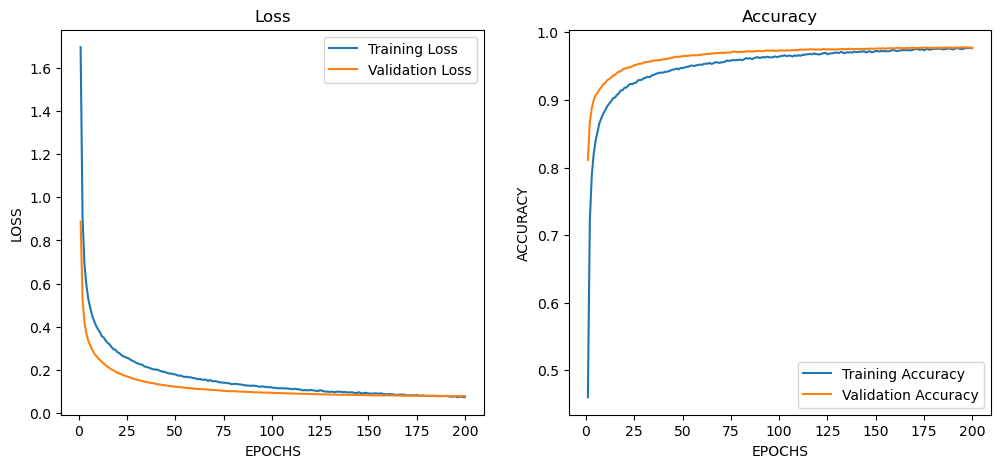

In [46]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,EPOCHS+1),model_history2.history['loss'], )
plt.plot(np.arange(1,EPOCHS+1),model_history2.history['val_loss'])
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,EPOCHS+1),model_history2.history['accuracy'])
plt.plot(np.arange(1,EPOCHS+1),model_history2.history['val_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy")

plt.show();

## Testing diff. Optimizers

In short, it is generally a good approach to test how a net performs when some dropout function is adopted.

> Besides that, **note that training accuracy should still be above test accuracy; otherwise, we might be not training for long enough. This is the case in our example** and therefore we should increase the number of epochs.

However, before performing this attempt we need to introduce a few other concepts that allow the training to converge faster. Let's talk about optimizers.

#### `optimizer = 'RMSProp'` 

```
loss: 0.0925 - accuracy: 0.9728 - val_loss: 0.0941 - val_accuracy: 0.9742
test: loss: 0.0828 - accuracy: 0.9758
```

Much faster only 10 Epochs

In [49]:
from tensorflow.keras.backend import clear_session 
clear_session()

In [50]:
# Model Parans
EPOCHS = 10
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, 
                             input_shape=(RESHAPED,),
                             name='dense_layer',
                             activation='relu'))
# A drop-out layer after first dense layer
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2',
                             activation='relu'))

model.add(keras.layers.Dropout(DROPOUT))

# Output layer
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_3',
                             activation='softmax'))

# Model Summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [51]:
# Compile the model
model.compile(optimizer='RMSProp',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model_history3 = model.fit(X_train, y_train,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           validation_split=VALIDATION_SPLIT,
                           verbose=VERBOSE, workers=None)

Epoch 1/10
375/375 [==============================] - 3s 5ms/step - loss: 0.4682 - accuracy: 0.8578 - val_loss: 0.1853 - val_accuracy: 0.9446
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2231 - accuracy: 0.9338 - val_loss: 0.1309 - val_accuracy: 0.9619
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1753 - accuracy: 0.9488 - val_loss: 0.1161 - val_accuracy: 0.9658
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1473 - accuracy: 0.9563 - val_loss: 0.1118 - val_accuracy: 0.9682
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1290 - accuracy: 0.9620 - val_loss: 0.1089 - val_accuracy: 0.9684
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1203 - accuracy: 0.9647 - val_loss: 0.1018 - val_accuracy: 0.9705
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1089 - accuracy: 0.9678 - val_loss: 0.0967 - val_accuracy: 0.9733
Epoch 

In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

313/313 [==============================] - 1s 4ms/step - loss: 0.0828 - accuracy: 0.9758
Test Accuracy: 0.9757999777793884
Test Loss: 0.08276524394750595


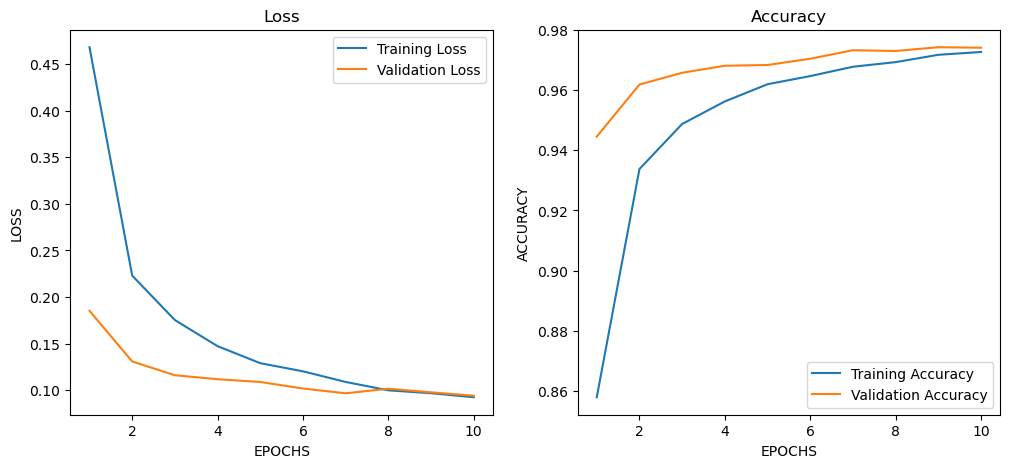

In [52]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,EPOCHS+1),model_history3.history['loss'], )
plt.plot(np.arange(1,EPOCHS+1),model_history3.history['val_loss'])
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,EPOCHS+1),model_history3.history['accuracy'])
plt.plot(np.arange(1,EPOCHS+1),model_history3.history['val_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy")

plt.show();

#### `optimizer = 'adam'`

In [54]:
from tensorflow.keras.backend import clear_session 
clear_session()

In [61]:
# Model Parans
EPOCHS = 15
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   # number of outputs = number of digits
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 # how much TRAIN is reserved for VALIDATION
DROPOUT = 0.3

# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, 
                             input_shape=(RESHAPED,),
                             name='dense_layer',
                             activation='relu'))
# A drop-out layer after first dense layer
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(N_HIDDEN,
                             name='dense_layer_2',
                             activation='relu'))

model.add(keras.layers.Dropout(DROPOUT))

# Output layer
model.add(keras.layers.Dense(NB_CLASSES,
                             name='dense_layer_3',
                             activation='softmax'))

# Model Summary
model.summary()

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model_history4 = model.fit(X_train, y_train,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           validation_split=VALIDATION_SPLIT,
                           verbose=VERBOSE, workers=None)

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________
Epoch 1/15
375/375 [============================

In [62]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

313/313 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9789
Test Accuracy: 0.9789000153541565
Test Loss: 0.06993284076452255


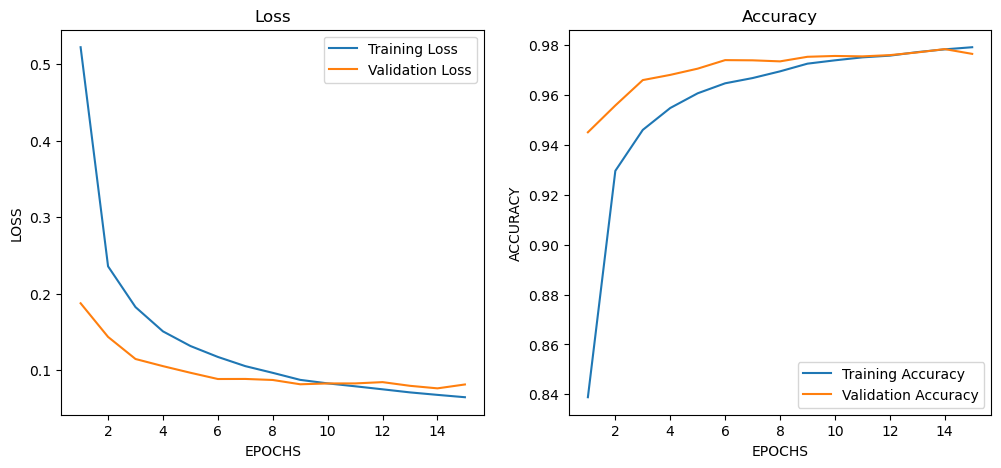

In [63]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,EPOCHS+1),model_history4.history['loss'], )
plt.plot(np.arange(1,EPOCHS+1),model_history4.history['val_loss'])
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,EPOCHS+1),model_history4.history['accuracy'])
plt.plot(np.arange(1,EPOCHS+1),model_history4.history['val_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy")

plt.show();

## Regularization

- Regularization
- Batch Normalization

#### Overfitting/Underfitting

- Causing a model to lose its ability to perfom well in generalized context is termed as **"overfitting".**
    
    - This is because a complex model is able to capture relationships b/w many parameters in the specific training context, but these relationships in fact do not exist within a more generalized context. Thus performing poorly on validation/test data while extremely well on training samples.<br></br>
    
- **Underfitting:** This happens when a data model cannot capture the relationship between the input and output variables accurately, with a high error rate on both the training set and new unseen data.

<div align='center'>
    <img src='images/over_under_fit.png' width=500/>
</div>

- As a rule of thumb, if during the training we see that the loss increases on validation, after an initial decrease, then we have a problem of model complexity that overfits the training data.

### Solving Overfitting: Regulazization

- In order to solve the overfitting problem, we need a way to capture the complexity of a model, i.e. how complex a model can be. What could the solution be? 

    - Well, a model is nothing more than a vector of weights. Each weight affects the output, except for those which are zero, or very close to it. Therefore, the complexity of a model can be conveniently represented as the number of non-zero weights. <br></br>

- In other words, if we have two models M1 and M2 achieving pretty much the same performance in terms of a loss function, then we should choose the simplest model, the one which has the minimum number of non-zero weights. 

- We can use a hyperparameter $\lambda \geq 0$ for controlling the importance of having a simple model: $$min : \text{\{loss(Training Data|Model)\}} + \lambda * \text{complexity(Model)}$$


- There are three different types of regularization used in machine learning:
    - **L1 regularization(also known as LASSO):** The complexity of the model is expressed as the sum of the absolute values of the weights.
    
    - **L2 regularization(also known as Ridge):** The complexity of the model is expressed as the sum of the squares of the weights.
    
    - **ElasticNet regularization:** The complexity of the model is captured by a combination of the two techniques above.


Note that playing with regularization can be a good way to increase the generalization performance of a network, particularly when there is an evident situation of overfitting. 

In [11]:
from tensorflow.keras.backend import clear_session
clear_session()

In [50]:
# ?keras.layers.Dense

- `kernel_regularizer`: Regularizer function applied to the `kernel` weights matrix.

- `bias_regularizer`: Regularizer function applied to the bias vector.

- `activity_regularizer`: Regularizer function applied to the output of the layer (its "activation").

In [51]:
from tensorflow.keras.regularizers import l2, l1

# Model Parans
EPOCHS = 13
BATCH_SIZE = 128
VERBOSE = 1
NB_CLASSES = 10   
N_HIDDEN = 128
VALIDATION_SPLIT=0.2 
DROPOUT = 0.3

# Build the model
model = tf.keras.models.Sequential()
model.add(keras.layers.Dense(N_HIDDEN, input_shape=(RESHAPED,),
                             name='dense_layer', activation='relu',
                             kernel_regularizer=l2(0.01),
                             activity_regularizer=l2(0.01),
                             bias_regularizer=l2(0.01)))
# A drop-out layer after first dense layer
model.add(keras.layers.Dropout(DROPOUT))

model.add(keras.layers.Dense(N_HIDDEN, name='dense_layer_2',
                             activation='relu',))

model.add(keras.layers.Dropout(DROPOUT))

# Output layer
model.add(keras.layers.Dense(NB_CLASSES, name='dense_layer_3',
                             activation='softmax',))

# Model Summary
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 128)               100480    
                                                                 
 dropout_18 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer_2 (Dense)       (None, 128)               16512     
                                                                 
 dropout_19 (Dropout)        (None, 128)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                1290      
                                                                 
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [52]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Fit the model
model_history5 = model.fit(X_train, y_train,
                           batch_size=BATCH_SIZE,
                           epochs=EPOCHS,
                           validation_split=VALIDATION_SPLIT,
                           verbose=VERBOSE, workers=10,
                           use_multiprocessing=True)

Epoch 1/13
375/375 [==============================] - 2s 4ms/step - loss: 1.0076 - accuracy: 0.8486 - val_loss: 0.3858 - val_accuracy: 0.9410
Epoch 2/13
375/375 [==============================] - 1s 4ms/step - loss: 0.4259 - accuracy: 0.9226 - val_loss: 0.3053 - val_accuracy: 0.9553
Epoch 3/13
375/375 [==============================] - 1s 4ms/step - loss: 0.3823 - accuracy: 0.9290 - val_loss: 0.3121 - val_accuracy: 0.9508
Epoch 4/13
375/375 [==============================] - 1s 4ms/step - loss: 0.3666 - accuracy: 0.9334 - val_loss: 0.2811 - val_accuracy: 0.9597
Epoch 5/13
375/375 [==============================] - 1s 4ms/step - loss: 0.3533 - accuracy: 0.9367 - val_loss: 0.2780 - val_accuracy: 0.9608
Epoch 6/13
375/375 [==============================] - 1s 4ms/step - loss: 0.3485 - accuracy: 0.9378 - val_loss: 0.2662 - val_accuracy: 0.9623
Epoch 7/13
375/375 [==============================] - 1s 4ms/step - loss: 0.3441 - accuracy: 0.9380 - val_loss: 0.2635 - val_accuracy: 0.9610
Epoch 

In [53]:
test_loss, test_acc = model.evaluate(X_test, y_test)

print(f"Test Accuracy: {test_acc}\nTest Loss: {test_loss}")

313/313 [==============================] - 1s 3ms/step - loss: 0.2594 - accuracy: 0.9629
Test Accuracy: 0.9628999829292297
Test Loss: 0.2593517601490021


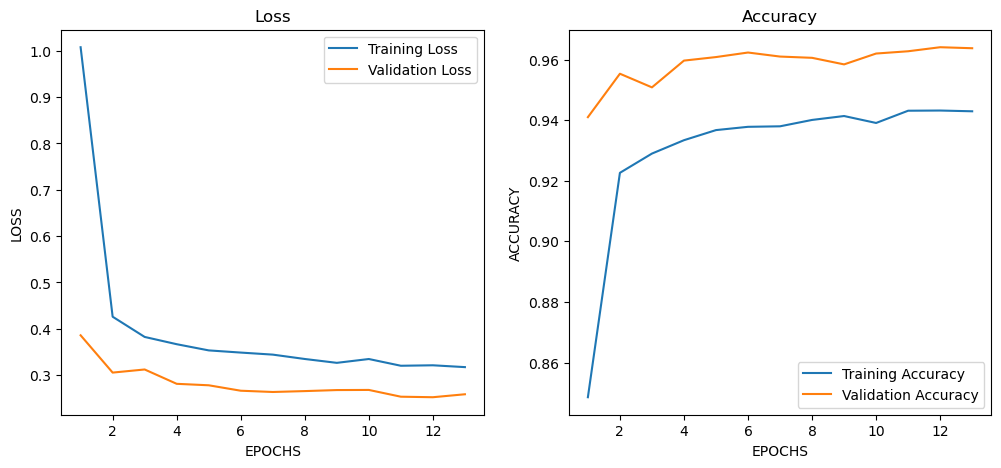

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(np.arange(1,EPOCHS+1),model_history5.history['loss'], )
plt.plot(np.arange(1,EPOCHS+1),model_history5.history['val_loss'])
plt.xlabel("EPOCHS")
plt.ylabel("LOSS")
plt.legend(['Training Loss', 'Validation Loss'])
plt.title("Loss")

plt.subplot(1,2,2)
plt.plot(np.arange(1,EPOCHS+1),model_history5.history['accuracy'])
plt.plot(np.arange(1,EPOCHS+1),model_history5.history['val_accuracy'])
plt.xlabel("EPOCHS")
plt.ylabel("ACCURACY")
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.title("Accuracy")

plt.show();

### Understanding Batch Normalization

Batch normalization is another form of regularization that enables us to accelerate training, in some cases by halving the training epochs, and it offers some regularization. 

$\rightarrow$ The Problem
- During training, the weights in early layers naturally change and therefore the inputs of later layers can significantly change. In other words, each layer must continuously re-adjust its weights to the different distribution for every batch. This may slow down the model's training greatly.

- Another issue is that the sigmoid activation function works very well close to zero but tends to "get stuck" when values get suffciently far away from zero. If, occasionally, neuron outputs fluctuate far away from the sigmoid zero, then said neuron becomes unable to update its own weights.

* ** 

$\rightarrow$ Key Ideas behind Batch Norm.
- The key idea is to make layer inputs more similar in distribution, batch after batch and epoch after epoch. 

- The other key idea is therefore to transform the layer outputs into a **Gaussian distribution** unit close to zero. This way, layers will have significantly less variation from batch to batch. 

* **

Mathematically, the formula is very simple. The activation input x is centered around zero by subtracting the batch mean $\mu$ from it, then result is divided by $\sigma + \epsilon$, the sum of batch variance $\sigma$ and small no. $\epsilon$ to prevent zero division.

Then a linear transformation is applied $y = \lambda x + \beta$ to make sure normalizing effect is applied during training.

In this way, $\lambda$ and $\beta$ are parameters that get optimized during the training phase in a way similar to any other layer. 

* **

$\rightarrow$ How Batch Normalization helps?
- Batch normalization has been proven to be a very effective way to increase both the speed of training and accuracy, because it helps to prevent activations becoming either too small and vanishing or too big and exploding.

## Backpropagation - Intution

- Multi-layer Perceptrons/Neural Networks learn from the training data via a process called backpropagation.

- Each NN layer has an associated set of weights that determine the o/p values for a given set of i/ps. And also NNs can have multiple hidden layers.

Let's see how Backpropagation works:

- At the beginning, all the weights have some random assignment. Then the neural network is activated for each input in the training set: values are propagated forward from the input stage through the hidden stages to the output stage where a prediction is made. 
<div align='center'>
    <img src='images/forward.png'/>
</div>
- Since we know the true observed value in the training set, it is possible to calculate the error made in the prediction.

- The key intuition for backtracking is to propagate the error back using an appropriate optimizer algorithm such as a GD to adjust the NN weights with the goal of reducing the error.
<div align='center'>
    <img src='images/backward.png'/>
</div>
- The process of forward propagation from input to output and backward propagation of errors is repeated several times until the error gets below a predefined threshold.
<div align='center'>
    <img src='images/fwd_bwd.png'/>
</div>
- The features represent the input, and the labels are used here to drive the learning process. The model is updated in such a way that the loss function is progressively minimized. 

- In a neural network, what really matters is not the output of a single neuron but the collective weights adjusted in each layer. Therefore, the network progressively adjusts its internal weights in such a way that the prediction increases the number of correctly forecasted labels. 

- Of course, using the right set of features and having quality labeled data is fundamental to minimizing the bias during the learning process.